## Get Tweets

In [72]:
import tweepy
import pandas as pd
from datetime import datetime
from dateutil import rrule
from dateutil.relativedelta import *
import time

In [73]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAGjtbgEAAAAAyx9oZIai1hXZ9OyDhUUFMZQivpc%3DUunewUXR9hw3nyKQhjqdmfg7zSAoa1nPv6WKLLSPB7OwKwYBP3')

In [74]:
#specify query
#query = 'from:Fridays4future -is:retweet'
query = 'Fridays4future -is:retweet'

#specify tweets timeframe
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

#save tweets in DataFrame
columns = ['Tweet_id', 'Tweet','Created_at']
data = []
n=1

# return max 100 tweets per month and append it to a list
for dt in rrule.rrule(rrule.WEEKLY, dtstart=start_date, until=end_date):
    start_time = dt.isoformat() + str('Z')
    
    print("Week", n)
    print("End:", start_time)
    
    end_time = (dt+relativedelta(weeks=+1)).isoformat() + str('Z')
    print("Start:", end_time)
    
    tweets = client.search_all_tweets(query=query, tweet_fields=['context_annotations', 'created_at'],
                                     start_time=start_time, end_time=end_time, max_results=10)
    
    n=+1
    time.sleep(2.5)
    
    for tweet in tweets.data:
        data.append([tweet.id, tweet.text, tweet.created_at])

Week 1
End: 2019-01-01T00:00:00Z
Start: 2019-01-08T00:00:00Z
Week 1
End: 2019-01-08T00:00:00Z
Start: 2019-01-15T00:00:00Z
Week 1
End: 2019-01-15T00:00:00Z
Start: 2019-01-22T00:00:00Z
Week 1
End: 2019-01-22T00:00:00Z
Start: 2019-01-29T00:00:00Z
Week 1
End: 2019-01-29T00:00:00Z
Start: 2019-02-05T00:00:00Z
Week 1
End: 2019-02-05T00:00:00Z
Start: 2019-02-12T00:00:00Z
Week 1
End: 2019-02-12T00:00:00Z
Start: 2019-02-19T00:00:00Z
Week 1
End: 2019-02-19T00:00:00Z
Start: 2019-02-26T00:00:00Z
Week 1
End: 2019-02-26T00:00:00Z
Start: 2019-03-05T00:00:00Z
Week 1
End: 2019-03-05T00:00:00Z
Start: 2019-03-12T00:00:00Z
Week 1
End: 2019-03-12T00:00:00Z
Start: 2019-03-19T00:00:00Z
Week 1
End: 2019-03-19T00:00:00Z
Start: 2019-03-26T00:00:00Z
Week 1
End: 2019-03-26T00:00:00Z
Start: 2019-04-02T00:00:00Z
Week 1
End: 2019-04-02T00:00:00Z
Start: 2019-04-09T00:00:00Z
Week 1
End: 2019-04-09T00:00:00Z
Start: 2019-04-16T00:00:00Z
Week 1
End: 2019-04-16T00:00:00Z
Start: 2019-04-23T00:00:00Z
Week 1
End: 2019-04-23T0

In [75]:
#create dataframe & remove duplicates
df = pd.DataFrame(data, columns=columns)
df.drop_duplicates(inplace=True)
df.shape

(512, 3)

array([[<AxesSubplot:title={'center':'Tweet_id'}>,
        <AxesSubplot:title={'center':'Created_at'}>]], dtype=object)

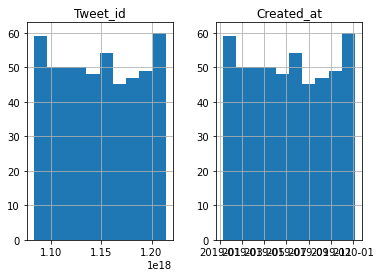

In [76]:
#tweets per month
df.hist()

In [77]:
# save as csv
df.to_csv('fff_2019_byhashtag.csv', index=False)

## Enrich Tweets

Currently only adds location of tweets

In [78]:
from twitter_demographer.twitter_demographer import Demographer
from twitter_demographer.components import Rehydrate
#from twitter_demographer.geolocation import NominatimDecoder
#from twitter_demographer.demographics.m3 import GenderAndAge
import pandas as pd

demo = Demographer()

data = pd.DataFrame({"tweet_ids": df['Tweet_id']})

component_one = Rehydrate('AAAAAAAAAAAAAAAAAAAAAGjtbgEAAAAAyx9oZIai1hXZ9OyDhUUFMZQivpc%3DUunewUXR9hw3nyKQhjqdmfg7zSAoa1nPv6WKLLSPB7OwKwYBP3')
#component_two = NominatimDecoder()
#component_three = HuggingFaceClassifier("cardiffnlp/twitter-roberta-base-sentiment")


demo.add_component(component_one)
#demo.add_component(component_two)
#demo.add_component(component_three)

data_enriched = demo.infer(data)



Running Hydrate:  41%|████      | 209/512 [00:05<00:09, 30.36it/s]


Running Hydrate:  83%|████████▎ | 424/512 [00:09<00:01, 48.22it/s]


Running Hydrate:  83%|████████▎ | 425/512 [00:09<00:01, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]                       
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 534it [00:10, 50.23it/s]
Running Hydrate: : 639it [00:10, 61.78it/s]
Running Demographer: 100%|██████████| 1/1 [00:10<00:00, 10.39s/it]


In [79]:
print(data_enriched['location'].isnull().sum())
print(data_enriched.shape)
print(data_enriched)

127
(512, 4)
                                           screen_name  \
270  12da725efe954d5e051d772c657a5a17ff9c680f331a5f...   
197  f16980714230c21fb946d9195d660188b6d044779b03f1...   
495  a0f73e27ac96e7407c3b3dd28f21ed338ec38d02a73524...   
186  56e4b88ad12adfc7d46a8a39222ad5b11830dc0f2f9239...   
72   da703afc85bda45cdb796b85f646a501dc46dcaa8bb2d9...   
..                                                 ...   
356  92db34fc84b5764b0bb66e9dd9b95fc7b4178e9961f354...   
317  01d447929638311342bf00409571b0f420a8423c21b751...   
227  06d69d26d8b72ddb1cae107e634e471b2dcb8d7584fc50...   
273  df453def045ae98400fefd61d9cb59abacc0d7adeb16f4...   
8    35a6c83aed693d6883e2018e15d9f584d91b0178c64523...   

                       location                created_at  \
270                 Deutschland 2019-07-15 21:44:55+00:00   
197            West of Ireland  2019-05-20 22:22:59+00:00   
495  tuscarora nation territory 2019-12-30 23:11:47+00:00   
186                        None 2019-05-13 22:

In [81]:
# save as csv
data_enriched.to_csv('fff_2019_byhashtag_enriched.csv', index=False)